## ANN Simple in Tensorflow 2.0


#### Steps for building your first ANN 

- Data Preprocessing
- Add input layer
- Random w init
- Add Hidden Layers
- Select Optimizer, Loss, and Performance Metrics
- Compile the model
- use model.fit to train the model
- Evaluate the model
- Adjust optimization parameters or model if needed
- Plot The History Keyss
- Save and Load for Inference

In [1]:
# pip install tensorflow==2.0.0-rc0
# pip install tensorflow-gpu==2.0.0-rc0

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [3]:
print(tf.__version__)

2.7.0


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv('D:\data\Customer_Churn_Modelling.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X =dataset.drop(['RowNumber','CustomerId','Exited','Surname'],axis=1)
y =dataset['Exited']


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
from sklearn.preprocessing import LabelEncoder
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])
X['Gender'] = label1.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [11]:
X = pd.get_dummies(X,drop_first=True,columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


### Feature Standardization 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 65)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
np.mean(X_train)

4.7477173707606696e-17

### Build ANN 

In [16]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
 X.shape[1]

11

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [19]:
X.shape[1]

11

In [20]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [21]:
history= model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 0.4413 - accuracy: 0.8070 - val_loss: 0.3971 - val_accuracy: 0.8305
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8520 - val_loss: 0.3657 - val_accuracy: 0.8455
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3465 - accuracy: 0.8586 - val_loss: 0.3533 - val_accuracy: 0.8505
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8656 - val_loss: 0.3495 - val_accuracy: 0.8515
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8639 - val_loss: 0.3519 - val_accuracy: 0.8520
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3295 - accuracy: 0.8655 - val_loss: 0.3538 - val_accuracy: 0.8495
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3279 - accuracy: 0.8664 - val_loss: 0.3589 - val_accuracy: 0.8480
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


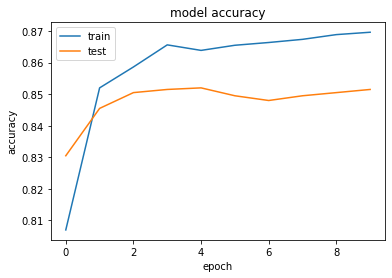

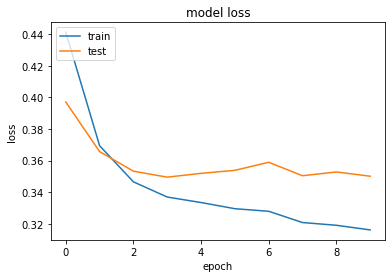

In [22]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
y_pred = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [25]:
y_test

4876    0
9340    0
984     0
4202    0
5745    0
       ..
7645    0
9092    1
1148    0
2809    0
2503    0
Name: Exited, Length: 2000, dtype: int64

In [26]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 727us/step - loss: 0.3501 - accuracy: 0.8515


[0.35008153319358826, 0.8514999747276306]

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [29]:
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets